In [3]:
# Dependencies
from bs4 import BeautifulSoup
import requests
import pymongo
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Setup splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [5]:
# Initialise PyMongo to work with MongoDBs
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [6]:
# Define database and collection
db = client.mars_weather_db
collection = db.weather

In [7]:
#Setting up browser for the Website from which the data is to be scraped
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [14]:
#Scrapping the weather data from the Mars website
table = pd.read_html(url)
table

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [15]:
#Converting the data into a Data Frame
mars_weather_df = table[0]
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [17]:
#Checking the data type
mars_weather_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [19]:
#converting terrestrial_date to datetime
mars_weather_df["terrestrial_date"]=pd.to_datetime(mars_weather_df["terrestrial_date"], dayfirst=True)
mars_weather_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### 1. How many months are there on Mars?

In [25]:
#Determining the number of months on Mars
mars_months = mars_weather_df['month'].max()
print(f'There are {mars_months} months on Mars.')

There are 12 months on Mars.


### 2. How many Martian (not Earth) days' worth of data are there in the scraped dataset?

In [27]:
#Determining the Martian days (sol)
martian_days = mars_weather_df['sol'].count()
print(f'There is {martian_days} days worth of data in the scrapped dataset')

There is 1867 days worth of data in the scrapped dataset


### 3. What are the coldest and warmest months on Mars (at the location of Curiosity)?

In [35]:
#Determining the coldest and warmest months on Mars
min_df = mars_weather_df.groupby('month').mean()
min_df

,id,sol,ls,min_temp,pressure
month,,,,,
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
6,735.306122,750.829932,164.897959,-75.299320,745.054422
7,714.549296,715.105634,194.894366,-72.281690,795.105634
8,718.078014,795.333333,224.347518,-68.382979,873.829787
9,785.843284,861.186567,254.052239,-69.171642,913.305970


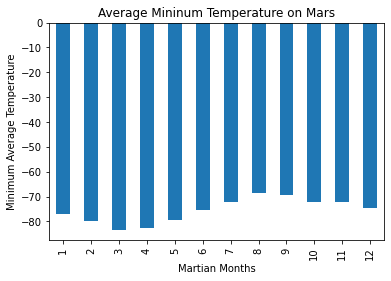

In [43]:
#Plotting the data into a bar chart
plot_df = pd.DataFrame(min_df['min_temp'])
plot_df.plot.bar(x=None, y=None, title="Average Mininum Temperature on Mars", legend=None)
plt.xlabel("Martian Months")
plt.ylabel("Minimum Average Temperature");


###### According to the data month 3 is the coldest month on Mars

### 4. Which months have the lowest and highest atmospheric pressure on Mars?

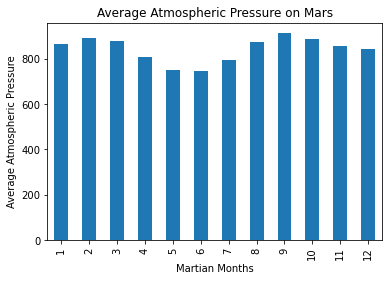

In [42]:
#Plotting the data into a bar chart
plot_df = pd.DataFrame(min_df['pressure'])
plot_df.plot.bar(x=None, y=None, title="Average Atmospheric Pressure on Mars", legend=None)
plt.xlabel("Martian Months")
plt.ylabel("Average Atmospheric Pressure");

###### According to the data month 6 has the lowest atmospheric pressure and month 9 has the highest atmospheric pressure on Mars

### 5. Approximately how many terrestrial (earth) days are there in a Martian year?

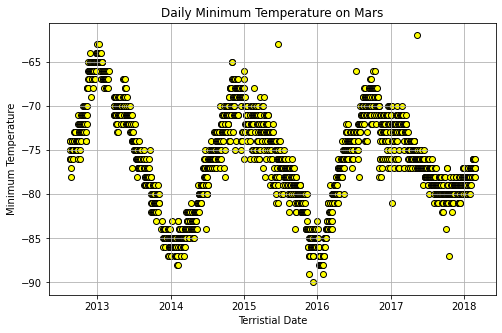

In [46]:
plt.figure(figsize=(8,5))
plt.scatter(mars_weather_df["terrestrial_date"], mars_weather_df["min_temp"], marker="o",facecolors="yellow", edgecolors="black")
plt.title("Daily Minimum Temperature on Mars")
plt.ylabel("Minimum Temperature")
plt.xlabel("Terristial Date")
plt.grid(True)

##### According to the plot above we can see that the temperatures increase in 2013 and drop by 2014 and then increase by 2015. This pattern indicates that there are twice as much terrestrial (earth) days on Mars as the temperature repeats every two years

### Exporting the DataFrame into CSV File

In [47]:
# Exporting the csv file without the index
mars_weather_df.to_csv("Resources/mars_weather.csv", index=False, header=True)

In [48]:
browser.quit()